<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/Iris_flower_data_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import sklearn
from sklearn.linear_model import LogisticRegressionCV
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize
from sklearn import metrics

In [3]:
warnings.filterwarnings(action = 'ignore', category=ConvergenceWarning)

In [21]:
## 数据加载
path = "iris.data"
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'cla']
df = pd.read_csv(path, header=None, names = names)

df.head()

,sepal_length,sepal_width,petal_length,petal_width,cla
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
df.info()
df.sepal_length.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   cla           150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
5.5     7
5.8     7
6.4     7
6.0     6
4.9     6
6.1     6
5.4     6
5.6     6
6.5     5
4.8     5
7.7     4
6.9     4
5.2     4
6.2     4
4.6     4
7.2     3
6.8     3
4.4     3
5.9     3
6.6     2
4.7     2
7.6     1
7.4     1
4.3     1
7.9     1
7.3     1
7.0     1
4.5     1
5.3     1
7.1     1
Name: sepal_length, dtype: int64

In [23]:
def parseRecord(record):
    result=[]
    r = zip(names,record)
    for name,v in r:
        if name == 'cla':
            if v == 'Iris-setosa':
                result.append(1)
            elif v == 'Iris-versicolor':
                result.append(2)
            elif v == 'Iris-virginica':
                result.append(3)
            else:
                result.append(np.nan)
        else:
            result.append(float(v))
    return result

In [46]:
### 1. 数据转换为数字以及分割
## 数据转换
datas = df.apply(lambda r: pd.Series(parseRecord(r), index = names),axis=1)

## 异常数据删除
datas = datas.dropna(how='any')

## 数据分割
X = datas[names[0:-1]]
Y = datas[names[-1]]
## 数据抽样(训练数据和测试数据分割)
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)
print("原始数据条数:%d；训练数据条数:%d；特征个数:%d；测试样本条数:%d" % (len(X), len(X_train), X_train.shape[1], X_test.shape[0]))

原始数据条数:150；训练数据条数:90；特征个数:4；测试样本条数:60


In [47]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,90.0,5.838889,0.889855,4.3,5.100,5.70,6.475,7.9
sepal_width,90.0,3.097778,0.427424,2.2,2.825,3.05,3.400,4.4
petal_length,90.0,3.651111,1.869401,1.1,1.500,4.15,5.175,6.9
petal_width,90.0,1.153333,0.804370,0.1,0.200,1.30,1.900,2.5


In [48]:
### 2. 数据化处理
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [49]:
### 5. 模型构建
lr = LogisticRegressionCV(Cs=np.logspace(-4,1,50), fit_intercept=True, penalty='l2', solver='lbfgs', tol=0.01, multi_class='multinomial')
lr.fit(X_train, Y_train)


LogisticRegressionCV(Cs=array([1.00000000e-04, 1.26485522e-04, 1.59985872e-04, 2.02358965e-04,
       2.55954792e-04, 3.23745754e-04, 4.09491506e-04, 5.17947468e-04,
       6.55128557e-04, 8.28642773e-04, 1.04811313e-03, 1.32571137e-03,
       1.67683294e-03, 2.12095089e-03, 2.68269580e-03, 3.39322177e-03,
       4.29193426e-03, 5.42867544e-03, 6.86648845e-03, 8.68511374e-03,
       1.09854114e-02, 1.38...
       1.20679264e+00, 1.52641797e+00, 1.93069773e+00, 2.44205309e+00,
       3.08884360e+00, 3.90693994e+00, 4.94171336e+00, 6.25055193e+00,
       7.90604321e+00, 1.00000000e+01]),
                     class_weight=None, cv=None, dual=False, fit_intercept=True,
                     intercept_scaling=1.0, l1_ratios=None, max_iter=100,
                     multi_class='multinomial', n_jobs=None, penalty='l2',
                     random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.01, verbose=0)

In [56]:
label_binarize(Y_test,classes=(1,2,3))

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0,

In [57]:
lr.decision_function(X_test)

array([[-4.198647  ,  0.90455406,  3.29409294],
       [-1.91651672,  2.8781106 , -0.96159388],
       [ 6.24698811,  0.71942973, -6.96641784],
       [-5.59745382,  1.86773312,  3.7297207 ],
       [ 5.20652353,  1.538309  , -6.74483253],
       [-4.79067356,  0.3693503 ,  4.42132325],
       [ 5.37843295,  1.33847452, -6.71690747],
       [-2.56957632,  1.61388469,  0.95569163],
       [-3.14719673,  2.125193  ,  1.02200373],
       [-1.46681299,  1.90965943, -0.44284644],
       [-3.43194618,  2.0413526 ,  1.39059358],
       [-1.86629475,  1.35297258,  0.51332217],
       [-1.884282  ,  1.96096767, -0.07668567],
       [-2.82587616,  1.92002577,  0.90585038],
       [-2.07864576,  1.6787201 ,  0.39992566],
       [ 4.94216152,  1.96202106, -6.90418258],
       [-1.98350111,  1.56460522,  0.41889589],
       [-1.32421229,  1.96067047, -0.63645818],
       [ 4.5682627 ,  1.90019497, -6.46845767],
       [ 5.49338381,  0.9200952 , -6.41347901],
       [-3.02987312,  1.12241747,  1.907

In [51]:
### 6. 模型效果输出
## 将正确的数据转换为矩阵形式  (每个类别使用向量来表示)
y_test_hot = label_binarize(Y_test,classes=(1,2,3))
## 得到预测的损失值
lr_y_score = lr.decision_function(X_test)
## 计算roc的值
lr_fpr, lr_tpr, lr_threasholds = metrics.roc_curve(y_test_hot.ravel(),lr_y_score.ravel())
## 计算auc的值
lr_auc = metrics.auc(lr_fpr, lr_tpr)
print("Logistic: ROC value：", lr.score(X_train, Y_train))
print("Logistic: AUC value：", lr_auc)

Logistic: R value： 0.9777777777777777
Logistic: AUC value： 0.9495833333333332


In [53]:
### 7. 模型预测
lr_y_predict = lr.predict(X_test)
print(lr_y_predict)

[3. 2. 1. 3. 1. 3. 1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 1. 3. 2. 1. 1.
 3. 1. 1. 2. 2. 1. 3. 2. 1. 3. 3. 2. 1. 2. 2. 2. 3. 1. 3. 1. 1. 2. 3. 3.
 2. 3. 2. 3. 2. 2. 3. 2. 2. 3. 2. 3.]


In [54]:
##### KNN算法实现
# a. 模型构建
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

# b. 模型效果输出
## 将正确的数据转换为矩阵形式
y_test_hot = label_binarize(Y_test,classes=(1,2,3))
## 得到预测的损失值
knn_y_score = knn.predict_proba(X_test)
## 计算roc的值
knn_fpr, knn_tpr, knn_threasholds = metrics.roc_curve(y_test_hot.ravel(),knn_y_score.ravel())
## 计算auc的值
knn_auc = metrics.auc(knn_fpr, knn_tpr)
print("KNN:ROC value：", knn.score(X_train, Y_train))
print("KNN:AUC value：", knn_auc)

KNN:ROC value： 0.9777777777777777
KNN:AUC value： 0.9694444444444446


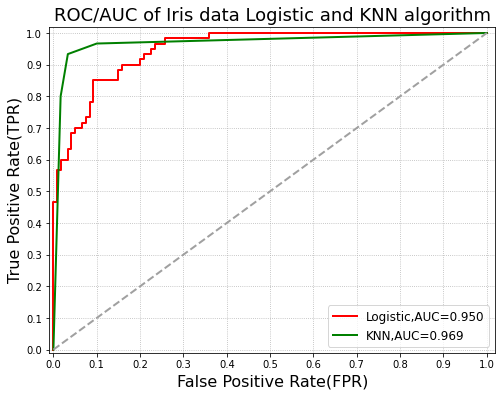

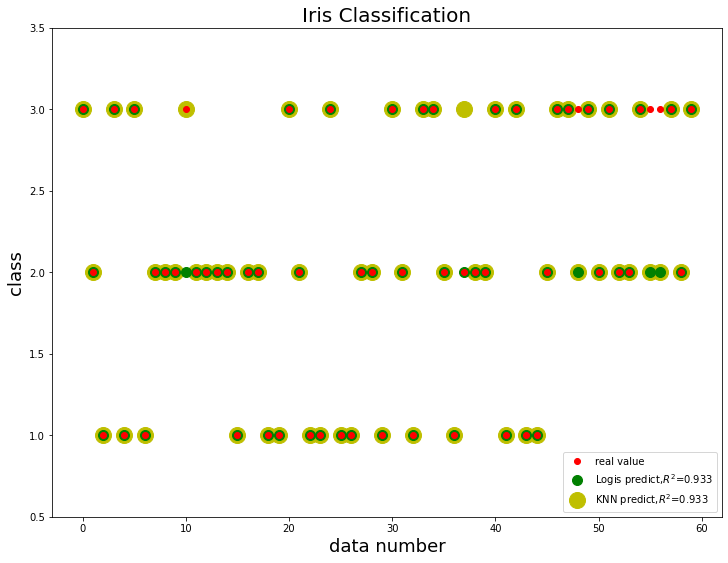

In [55]:
# c. 模型预测
knn_y_predict = knn.predict(X_test)

## 画图1：ROC曲线画图
plt.figure(figsize=(8, 6), facecolor='w')
plt.plot(lr_fpr,lr_tpr,c='r',lw=2,label=u'Logistic,AUC=%.3f' % lr_auc)
plt.plot(knn_fpr,knn_tpr,c='g',lw=2,label=u'KNN,AUC=%.3f' % knn_auc)
plt.plot((0,1),(0,1),c='#a0a0a0',lw=2,ls='--')
plt.xlim(-0.01, 1.02)
plt.ylim(-0.01, 1.02)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate(FPR)', fontsize=16)
plt.ylabel('True Positive Rate(TPR)', fontsize=16)
plt.grid(b=True, ls=':')
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
plt.title(u'ROC/AUC of Iris data Logistic and KNN algorithm', fontsize=18)
plt.show()

## 画图2：预测结果画图
x_test_len = range(len(X_test))
plt.figure(figsize=(12, 9), facecolor='w')
plt.ylim(0.5,3.5)
plt.plot(x_test_len, Y_test, 'ro',markersize = 6, zorder=3, label=u'real value')
plt.plot(x_test_len, lr_y_predict, 'go', markersize = 10, zorder=2, label=u'Logis predict,$R^2$=%.3f' % lr.score(X_test, Y_test))
plt.plot(x_test_len, knn_y_predict, 'yo', markersize = 16, zorder=1, label=u'KNN predict,$R^2$=%.3f' % knn.score(X_test, Y_test))
plt.legend(loc = 'lower right')
plt.xlabel(u'data number', fontsize=18)
plt.ylabel(u'class', fontsize=18)
plt.title(u'Iris Classification', fontsize=20)
plt.show()
